## Importing the Libraries and packages

In [1]:
import warnings as w
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
w.filterwarnings('ignore')


## Reading the datset

 ## Details of the data set
### The data set contains 97606 rows and 5 columns as follows:

> 1. **id** - a unique identifier for each IOT Device

> 2. **room_id/id** - the unique identifier of the room where the IOT Device is located

> 3. **noted_date** - the timestamp of the reading

> 4. **temp** - the temperature reading

> 5. **out/in** - whether the reading was taken from the outside or inside of the room

In [3]:
df = pd.read_csv(
    r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\IOT-temp.csv")
df.head()


,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


## Dropping the id and room_id/id columns.

In [4]:
df.drop(["id", "room_id/id"], axis=1, inplace=True)

## Printing the statistics of the dataset.

In [5]:
df.describe()


,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


## Printing the structure of data.

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   noted_date  97606 non-null  object
 1   temp        97606 non-null  int64 
 2   out/in      97606 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


## Checking the null values in the dataset.

In [7]:
df.isna().sum().sort_values(ascending=False)


noted_date    0
temp          0
out/in        0
dtype: int64

## Converting the timestamp column from object to datatime for feature engineering.

In [8]:
df["noted_date"] = pd.to_datetime(df["noted_date"])

df["date"] = df["noted_date"].dt.date
df["time"] = df["noted_date"].dt.time

df.drop("noted_date", axis=1, inplace=True)

## Encoding the labels into 0(In) and 1(Out).

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["out/in"] = le.fit_transform(df["out/in"])

## Extracting the Year, Month, Day from date column.

In [10]:
df.date = pd.to_datetime(df.date)

# We will only extract the month and day from the date column because the year is same for all the rows
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

## Plotting the box/whisker plot for temperature's data.

<Axes: xlabel='temp'>

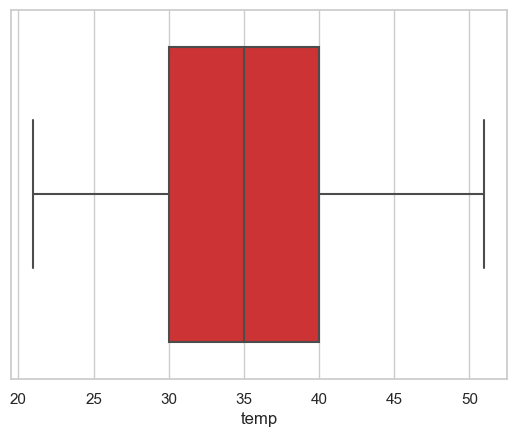

In [14]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="temp", data=df, palette="Set1")

## Data distribution of Temp of IOT devices is good.

In [17]:
a = df[["temp", "out/in"]].groupby("out/in").count()

a.reset_index(inplace=True)


## Plotting the barplot for temp vs in/out.

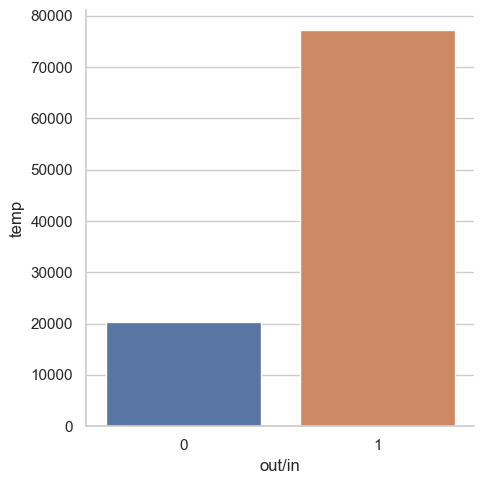

In [19]:
sns.catplot(x="out/in", y="temp", data=a, kind="bar")

> #### So after plotting the bar plot for in/out vs temperature we got to know that out temparatures of IOT devices are ranging in hotter range of temp and in temp are in low temp range.